# 차원 축소



### 차원의 저주

- 데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상

-> 차원이 증가, 혹은 변수가 증가함에 따라 모델의 성능이 나빠지는 현상
- 차원이 늘어날수록 빈 공간만 생김.

빈공간의 면적 : 1차원의 점 < 2차원의 점 < 3차원의 점 < 4차원의 점

간단하게 차원을 줄이거나 데이터를 많이 획득함.

## 차원을 감소시키는 두 가지 주요한 접근법

### 1. 투영

ex) 3차원의 평면 형태로 데이터가 존재 할 경우 2차 평면 형태로 옮긴다.

그러나 스위스 롤 처럼 데이터셋을 마냥 투영시키는게 답은 아니다.

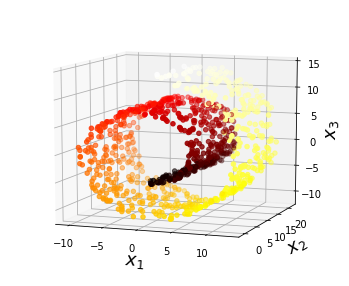

In [19]:
# 스위스롤
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [29]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### 2. 매니폴드 학습

- 고차원 공간을 휘어지거나 뒤틀린 저차원 공간을 나타내는 것을 의미한다.

In [30]:
import numpy as np 

X_centered = X - X.mean(axis = 0)

U, s, Vt = np.linalg.svd(X_centered)

In [31]:
w2 = Vt.T[:,:2]
X2d = X_centered.dot(w2)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x2d = pca.fit_transform(X)

In [34]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])